In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/santander-customer/heart_disease_uci.csv
/kaggle/input/santander-customer/diabetes_DT.csv
/kaggle/input/santander-customer/titanic_train.csv
/kaggle/input/santander-customer/Santander Customer Satisfaction_train.csv


In [37]:
# import pandas as pd 
import numpy as np
df=pd.read_csv('/kaggle/input/santander-customer/heart_disease_uci.csv')
duplicate_features=[]
quaisi_constant=[]
#One-Hot encoding 
df_cleaned=pd.get_dummies(df)
for col in df_cleaned.columns:
    if np.var(df_cleaned[col])==0:
        duplicate_features.append(col)

for col in df.columns:
    top_freq=df[col].value_counts(normalize=True).max()
    if top_freq>=0.95:
        quaisi_constant.append(col)
        
print(quaisi_constant)
print(duplicate_features)
print(df.head())

[]
[]
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


In [29]:
df2=pd.read_csv('/kaggle/input/santander-customer/diabetes_DT.csv')
duplicate_features=[]
#One-Hot Encoding 
df2_cleaned1=pd.get_dummies(df2)
duplicate_features=[]
for col in df2_cleaned1.columns:
    if np.var(df2_cleaned1[col])==0:
        duplicate_features.append(col)

print(duplicate_features)


        

[]


In [18]:
import pandas as pd
import numpy as np

# Sample data with 2 constant features
df = pd.DataFrame({
    "A": [1, 2, 3, 4, 5],        # Varying
    "B": [10, 10, 10, 10, 10],   # Constant
    "C": ["X", "X", "X", "X", "X"], # Constant categorical
    "D": [5, 6, 7, 8, 9]         # Varying
})

print("Original DataFrame:\n", df)

# One-hot encode
df_cleaned = pd.get_dummies(df)
print(df_cleaned)
# Detect constant features
constant_features = []
for col in df_cleaned.columns:
    if np.var(df_cleaned[col], ddof=0) == 0:
        constant_features.append(col)

print("\nConstant Features:", constant_features)


Original DataFrame:
    A   B  C  D
0  1  10  X  5
1  2  10  X  6
2  3  10  X  7
3  4  10  X  8
4  5  10  X  9
   A   B  D   C_X
0  1  10  5  True
1  2  10  6  True
2  3  10  7  True
3  4  10  8  True
4  5  10  9  True

Constant Features: ['B', 'C_X']


In [30]:
quasi_constant = []
for col in df2_cleaned1.columns:
    top_freq = df2_cleaned1[col].value_counts(normalize=True).max()
    if top_freq > 0.95:
        quasi_constant.append(col)

print("Quasi-constant features:", quasi_constant)


Quasi-constant features: []


In [34]:
quasi_constant=[]
for col in df_cleaned.columns:
    top_freq=df_cleaned[col].value_counts(normalize=True).max()
    if top_freq>=0.95:
        quasi_constant.append(col)

print(quasi_constant)     #Santander Dataset Quasi_Constant Features 

['cp_typical angina', 'thal_fixed defect']


In [42]:
#Duplicate Features in Santander DAtaset 
duplicate_features=[]

for i in range(len(df_cleaned.columns)):
    for j in range(i+1,len(df_cleaned.columns)):
        if df_cleaned.iloc[:,i].equals(df_cleaned.iloc[:,j]):
            duplicate_featues.append(df_cleaned.columns[j])
print(duplicate_features)

[]


In [5]:
#Duplocate features in Santander dataset 
dff=pd.read_csv('/kaggle/input/santander-customer/Santander Customer Satisfaction_train.csv')
df_cleaned=pd.get_dummies(dff)
constant_features=[]
quasi_constant=[]
duplicate_features=[]

for col in df_cleaned.columns:
    if np.var(df_cleaned[col].values)==0:
        constant_features.append(col)

print(constant_features)

for col in df_cleaned.columns:
    top_freq = df_cleaned[col].value_counts(normalize=True).max()
    if top_freq>=0.95:
        quasi_constant.append(col)
print()
print(quasi_constant)

for i in range(len(df_cleaned.columns)):
    for j in range(i+1,len(df_cleaned.columns)):
        if df_cleaned.iloc[:,i].equals(df_cleaned.iloc[:,j]):
            duplicate_features.append(df_cleaned.columns[j])

print()
print(duplicate_features)




['ind_var2_0', 'ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27', 'num_var41', 'num_var46_0', 'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46', 'imp_amort_var18_hace3', 'imp_amort_var34_hace3', 'imp_reemb_var13_hace3', 'imp_reemb_var33_hace3', 'imp_trasp_var17_out_hace3', 'imp_trasp_var33_out_hace3', 'num_var2_0_ult1', 'num_var2_ult1', 'num_reemb_var13_hace3', 'num_reemb_var33_hace3', 'num_trasp_var17_out_hace3', 'num_trasp_var33_out_hace3', 'saldo_var2_ult1', 'saldo_medio_var13_medio_hace3']

['var3', 'imp_ent_var16_ult1', 'imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'imp_op_var40_ult1', 'imp_sal_var16_ult1', 'ind_var1_0', 'ind_var1', 'ind_var2_0', 'ind_var2', 'ind_var5_0', 'ind_var6_0', 'ind_var6', 'ind_var8_0', 'ind_var8', 'ind_var12', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_

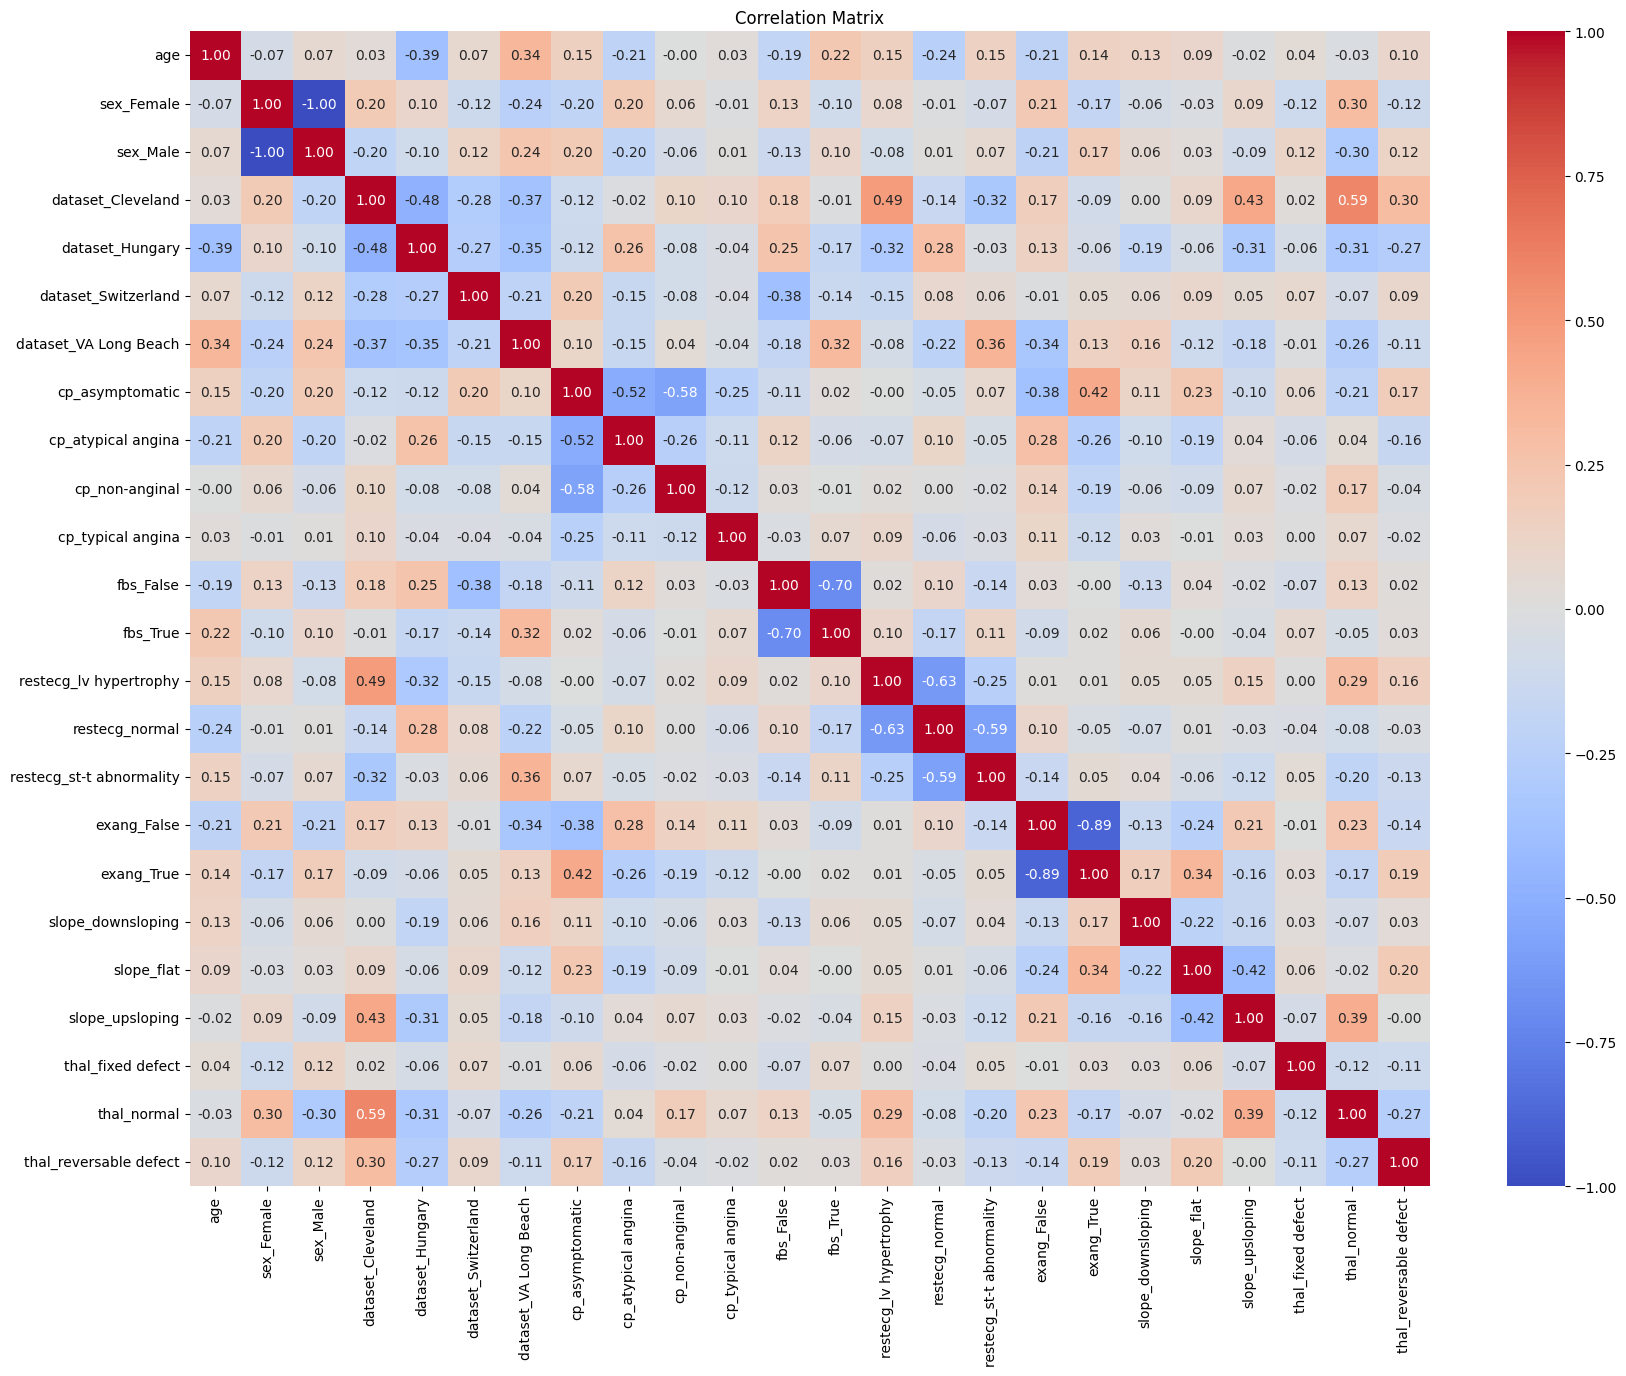

{'sex_Female'}
Index(['age', 'sex_Male', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_asymptomatic',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'fbs_False', 'fbs_True', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_False', 'exang_True',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')


In [62]:
#Coorelation for Heart Diesease 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Handling null values
cols_null=[]
for col in df.columns:
    if df[col].isnull().sum()>0:
        cols_null.append(col)
  
df=pd.get_dummies(df) #One-hot encoding 
X=df.drop(['id','num','trestbps', 'chol', 'thalch', 'oldpeak', 'ca'],axis=1)
y=df['num']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
corr_matrix=X_train.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Corr_cols=set()
threshold=0.9

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j])>threshold:
            Corr_cols.add(corr_matrix.columns[j])

print(Corr_cols)

X_train=X_train.drop(list(Corr_cols),axis=1)

print(X_train.columns)


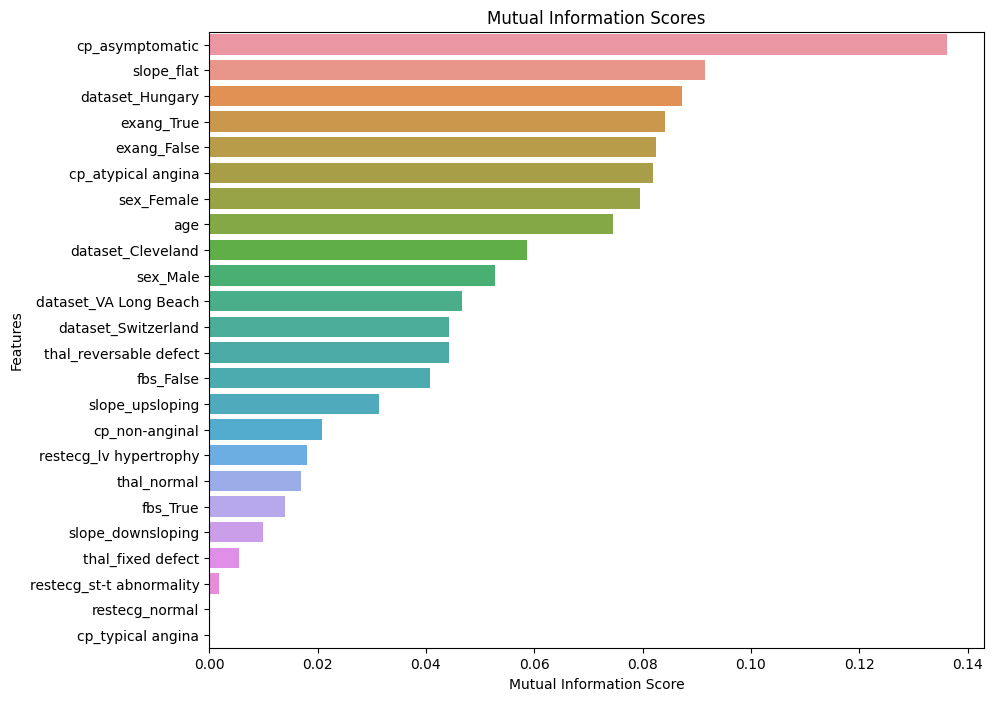

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif

# Assuming 'X' and 'y' are your feature DataFrame and target Series
mi_scores = mutual_info_classif(X, y)

# 2. Create a pandas Series for easy plotting
# This pairs each feature name with its MI score
mi_scores_series = pd.Series(mi_scores,index=X.columns)

mi_scores_series = mi_scores_series.sort_values(ascending=False)

# 4. Plot the scores as a bar chart
plt.figure(figsize=(10, 8)) # Adjust size as needed
sns.barplot(x=mi_scores_series, y=mi_scores_series.index)
plt.title("Mutual Information Scores")
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.show()